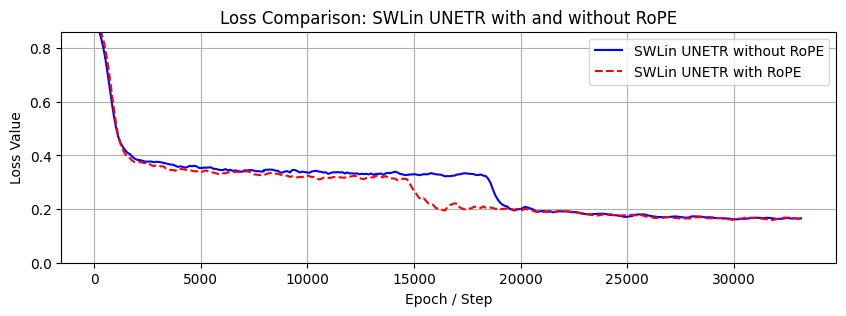

In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Function to load JSON and extract 'x' and 'y' lists from the first dictionary inside the list
def load_json_xy(file_path):
    with open(file_path, "r") as f:
        data = json.load(f)
    if isinstance(data, list) and len(data) > 0:  # Ensure it's a non-empty list
        return data[0].get("x", []), data[0].get("y", [])
    return [], []

# Function to smooth the y-values using a moving average
def smooth_curve(y, window_size=5):
    if len(y) < window_size:
        return y  # Return original if too few points
    return np.convolve(y, np.ones(window_size)/window_size, mode="valid")

# Load JSON files
x_norope, y_norope = load_json_xy("./extra/norope_lossgraph.json")
x_rope, y_rope = load_json_xy("./extra/rope_lossgraph.json")

# Smooth loss values
y_norope_smooth = smooth_curve(y_norope)
y_rope_smooth = smooth_curve(y_rope)

# Adjust x-values to match the smoothed y-values
x_norope_smooth = x_norope[:len(y_norope_smooth)]
x_rope_smooth = x_rope[:len(y_rope_smooth)]

# Plot both smoothed loss curves in a single graph
plt.figure(figsize=(10, 3))  # Adjusted height
plt.plot(x_norope_smooth, y_norope_smooth, label="SWLin UNETR without RoPE", linestyle="-", color="blue")
plt.plot(x_rope_smooth, y_rope_smooth, label="SWLin UNETR with RoPE", linestyle="--", color="red")

# Graph Labels
plt.xlabel("Epoch / Step")
plt.ylabel("Loss Value")
plt.title("Loss Comparison: SWLin UNETR with and without RoPE")
plt.legend()
plt.grid()

# Set Y-axis to start from 0
y_max = max(max(y_norope_smooth), max(y_rope_smooth))
plt.ylim(0, y_max * 0.95)  # Start from 0, adjust upper bound

# Show graph
plt.show()
